In [ ]:
# The data I used for this project was originally found at this web address
# https://www.stats.govt.nz/large-datasets/csv-files-for-download/
# It was found under the environment catagory, titled:
# Greenhouse gas emissions (industry and household): September 2022 quarter
# It is a public dataset that is free to download. However, I could not find a concrete CC license. 
# Full disclousure, I did edit the data I used so I will be attaching the exact file that I used
# to the project. Why did I edit the file instead of using coding for further filter it?
# Cause I was struggling to make sure more than one filter was actually working, let alone two. 
# The only edit is that I removed the data that was labeled "seasonally adjusted" and just went with
# the ones labeled "Actual". The original dataset was 100KB. I reduced it to 48KB.
# The data has 8 columns, Anzsic, Anzsic_Description, Period, Data_value, Variable, Units, Gas, and Status
# I focused my attention on Anzsic, Anzsic_Description andd Period, which was all string data
# as well as Data_value, which consisted of integers. 
# The remaining columns had no variation in the data listed. Units was Kilotonnes, Gas was Carbon Dioxide Equivalent, and Status was P.
# No, I do not know what P means as a status and I couldn't find an answer. 

#The following is my general public graphs, they are about as simple as my peer graphs but that speaks more to my coding ability. 
#I tried to make up for it by thinking about the sorts of questions I get at the public library desk where I work. 
#Also using brighter, but hopefully not too jarring colors. 

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
#Define filepath because Mac coding isn't great

data = pd.read_csv('/Users/megnoone/Desktop/School Shit/Grad School Stuff/Spring 2023/greenhouse-gas-emissions-industry-and-household-September-2022-quarter.csv', usecols=['Anzsic','Data_value','Period', 'Anzsic_description'])

In [199]:
# Create separate data frames for each quarter of our final pie chart
ag_data = data[data['Period'].str.contains('2020') & (data['Anzsic'] == 'AAZ')]
mi_data = data[data['Period'].str.contains('2020') & (data['Anzsic'] == 'BB1')]
ma_data = data[data['Period'].str.contains('2020') & (data['Anzsic'] == 'CCZ')]
tr_data = data[data['Period'].str.contains('2020') & (data['Anzsic'] == 'HH1')]
ho_data = data[data['Period'].str.contains('2020') & (data['Anzsic'] == 'HHD')]

In [200]:
#Make sure we have all our totals!
ag_total = ag_data['Data_value'].sum()
mi_total = mi_data['Data_value'].sum()
ma_total = ma_data['Data_value'].sum()
tr_total = tr_data['Data_value'].sum()
ho_total = ho_data['Data_value'].sum()

In [201]:
# Combine said totals all official like
totals = [ag_total, mi_total, ma_total, tr_total, ho_total]

In [202]:
colors = ['#1672c5','#c51672','#6916c5','#16c5c6', '#c116c5']

Text(0.5, 1.0, '% of CO2 Emissions by Industry Sector in 2020')

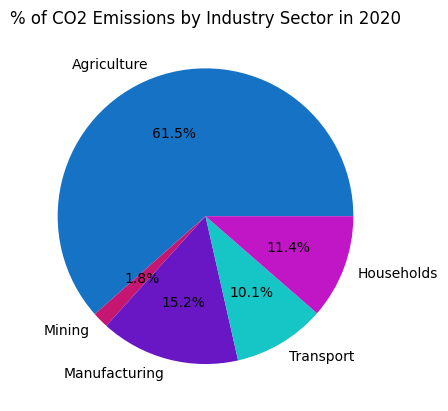

In [203]:
fig, ax = plt.subplots()
ax.pie(totals, labels=['Agriculture', 'Mining', 'Manufacturing', 'Transport', 'Households'], autopct='%1.1f%%', colors=colors)
ax.set_title('% of CO2 Emissions by Industry Sector in 2020')

In [204]:
#Now for a line chart of Household Emissions over the course of the 2020

In [205]:
category_data = data[(data['Period'].str.contains('2020')) & (data['Anzsic'] == 'HHD')]
period_totals = category_data.groupby('Period')['Data_value'].sum()

Text(0, 0.5, 'Total CO2 Emissions (Kilotonnes)')

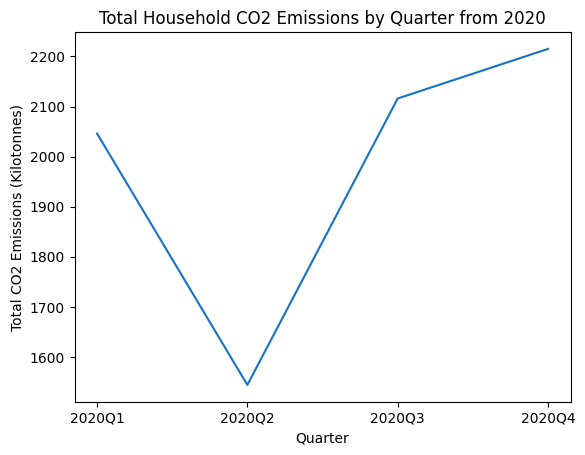

In [206]:
fig, ax = plt.subplots()
ax.plot(period_totals.index, period_totals, color='#1672c5')
ax.set_title('Total Household CO2 Emissions by Quarter from 2020')
ax.set_xlabel('Quarter')
ax.set_ylabel('Total CO2 Emissions (Kilotonnes)')

In [207]:
#Finally, a bar graph of the total of all sectors in the year 2022.

In [208]:
category_data = data[data['Period'].str.startswith('2022')]


In [209]:
category_totals = category_data.groupby('Anzsic_description')['Data_value'].sum()

Text(0.5, 0, 'Total CO2 Emissions (Kilotonnes)')

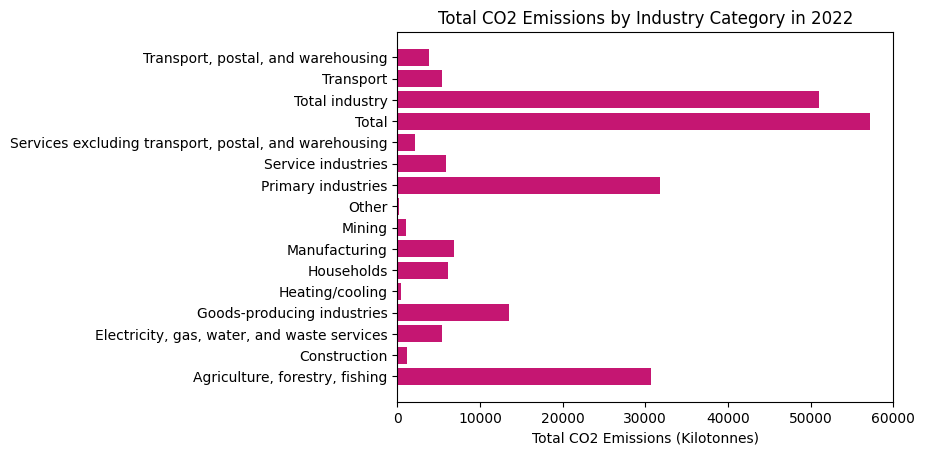

In [211]:
fig, ax = plt.subplots()
ax.barh(category_totals.index, category_totals, color = '#c51672')
ax.set_title(f'Total CO2 Emissions by Industry Category in 2022')
ax.set_xlabel('Total CO2 Emissions (Kilotonnes)')